In [60]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

In [61]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-19 00:20:35--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.66MB/s    in 61s     

2020-07-19 00:21:37 (5.02 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [80]:
# melakukan ekstraksi pada file zip
import zipfile
import shutil

zip_lokal = '/tmp/rockpaperscissors.zip'
zip_base = zipfile.ZipFile(zip_lokal, 'r')
zip_base.extractall('/tmp')
zip_base.close()

os.listdir('/tmp/rockpaperscissors')

base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

if os.path.exists(train_dir):
  shutil.rmtree(train_dir)

if os.path.exists(validation_dir):
  shutil.rmtree( validation_dir)

os.mkdir(train_dir)
os.mkdir(validation_dir)

rock_dir=os.path.join(base_dir, 'rock')
scissors_dir=os.path.join(base_dir, 'scissors')
paper_dir=os.path.join(base_dir, 'paper')

train_rock_dir, val_rock_dir=train_test_split(os.listdir(rock_dir),
                                              test_size=0.4)
train_scissors_dir, val_scissors_dir=train_test_split(os.listdir(scissors_dir),
                                                      test_size=0.4)
train_paper_dir, val_paper_dir=train_test_split(os.listdir(paper_dir),
                                                test_size=0.4)

In [81]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

os.makedirs(train_rock, exist_ok=True)
os.makedirs(train_paper,exist_ok=True)
os.makedirs(train_scissors,exist_ok=True)

os.makedirs(val_rock,exist_ok=True)
os.makedirs(val_paper,exist_ok=True)
os.makedirs(val_scissors,exist_ok=True)

In [82]:


for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [83]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [84]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  
        batch_size=16,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(150, 150), 
        batch_size=16, 
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [85]:
# membuat model 

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3),padding='same', activation = 'relu', 
                         input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(64,(3,3), padding='same', activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(128,(3,3), padding='same', activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(256,(3,3), padding='same', activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [86]:

model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.96):
      print("\nAkurasi sudah 96% pelatihan dihentikan!")
      self.model.stop_training = True



callbacks = myCallback()


history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2,
    callbacks=[callbacks]
)

Epoch 1/50
25/25 - 4s - loss: 1.2979 - accuracy: 0.3475 - val_loss: 1.0888 - val_accuracy: 0.3750
Epoch 2/50
25/25 - 3s - loss: 1.0749 - accuracy: 0.4200 - val_loss: 1.0273 - val_accuracy: 0.4875
Epoch 3/50
25/25 - 3s - loss: 0.9463 - accuracy: 0.5625 - val_loss: 0.8302 - val_accuracy: 0.6000
Epoch 4/50
25/25 - 3s - loss: 0.7798 - accuracy: 0.6700 - val_loss: 0.6881 - val_accuracy: 0.8375
Epoch 5/50
25/25 - 3s - loss: 0.5785 - accuracy: 0.7800 - val_loss: 0.5617 - val_accuracy: 0.7875
Epoch 6/50
25/25 - 3s - loss: 0.4280 - accuracy: 0.8475 - val_loss: 0.3063 - val_accuracy: 0.8625
Epoch 7/50
25/25 - 4s - loss: 0.3328 - accuracy: 0.8900 - val_loss: 0.2060 - val_accuracy: 0.9625
Epoch 8/50
25/25 - 3s - loss: 0.2962 - accuracy: 0.8950 - val_loss: 0.1858 - val_accuracy: 0.9375
Epoch 9/50
25/25 - 3s - loss: 0.3188 - accuracy: 0.9025 - val_loss: 0.3079 - val_accuracy: 0.8875
Epoch 10/50
25/25 - 3s - loss: 0.2695 - accuracy: 0.8925 - val_loss: 0.3347 - val_accuracy: 0.8500
Epoch 11/50
25/25 -

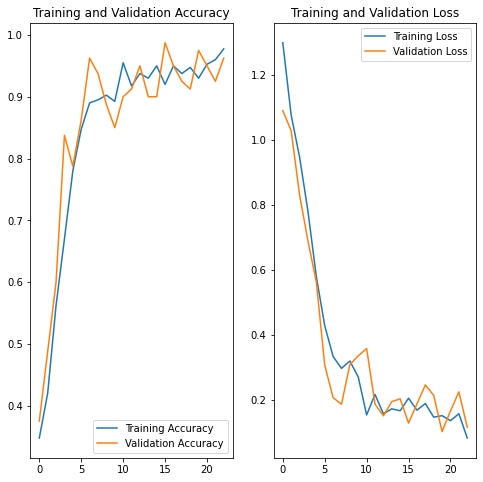

In [87]:

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

n_epochs = len(history.history['loss'])

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(n_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving test1.jpg to test1.jpg
test1.jpg
paper


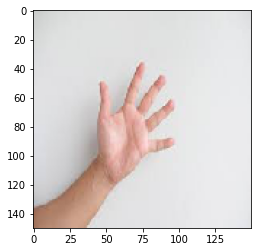

In [88]:

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')